In [52]:
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

In [53]:
# Read a PGM Image and return image matrix and its initials separately
def read_pgm(image_file):
    with open(image_file, 'r') as file:
        image = file.read().splitlines()
    for pixel in range(3,len(image)):
        image[pixel] = int(image[pixel])
    image_matrix = np.array(image[4:]).reshape(int(image[2].split()[1]),int(image[2].split()[0]))
    return (image_matrix, image[:4])

In [54]:
# Define Zero Padding
def zero_padding(image_matrix, width):
    padded_matrix = np.zeros((image_matrix.shape[0]+2*width,image_matrix.shape[1]+2*width))   
    padded_matrix[width:-width, width:-width] = image_matrix    
    return padded_matrix

In [55]:
# Define convolution Operation 
def convolution(image_matrix, kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])):
    k = (kernel.shape[0]-1)//2
    padded_image_matrix = zero_padding(image_matrix, k)
    filtered_matrix = np.zeros((image_matrix.shape[0], image_matrix.shape[1]), dtype=int)
    progress = 0
    print('convolution progress (in %)...')
    for i in range(k,padded_image_matrix.shape[0]-k):
        for j in range(k,padded_image_matrix.shape[1]-k):
            progress = progress +1
            if progress%10 == 0:           
                print(round(progress/image_matrix.size*100,2), end='\r')
            filtered_matrix[i-k,j-k] = int(np.sum((padded_image_matrix[i-k:i+k+1,j-k:j+k+1]*kernel)))
    return filtered_matrix

In [56]:
# Write PGM Image from matrix.
def matrix2pgm(image_matrix,initial,output_image_file_name = str(np.random.randint(1,100000000000)) + '_default.pgm'):    
    with open(output_image_file_name, 'w') as file:
        file.writelines("% s\n" % pixel for pixel in initial)
        file.writelines("% s\n" % int(abs(pixel)) for pixel in image_matrix.flatten())

In [57]:
# Identity Kernel
def identity_kernel(size=3):
    zero = np.zeros((size,size))
    zero[size//2,size//2] = 1
    return zero

In [58]:
# Gaussian Kernel
def gauss_kernel(size=3,sigma=1):
    center=(size//2)
    kernel=np.zeros((size,size))
    for i in range(size):
       for j in range(size):
          diff=np.sqrt((i-center)**2+(j-center)**2)
          kernel[i,j]=np.exp(-(diff**2)/(2*sigma**2))
    return kernel/np.sum(kernel)

### Blurring Image with Gaussian Kernel

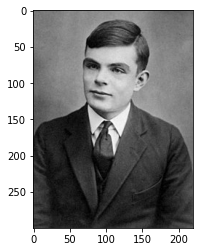

In [59]:
image = read_pgm('Alan_Turing.pgm')
plt.imshow(image[0])

convolution progress (in %)...


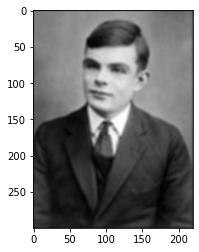

In [60]:
kernelG = gauss_kernel(5,3.3)
filtered_matrix = convolution(image[0], kernelG)
plt.imshow(filtered_matrix)
matrix2pgm(filtered_matrix,image[1],output_image_file_name = 'blured_Alan.pgm')

### Outline detection using Sobel Method

In [61]:
image = read_pgm('flower.pgm')
image_matrix = image[0]
initials = image[1]

In [62]:
# Vertical line
sobel_v = np.array([[-0.25,0.00,0.25],[-0.50,0.00,0.50],[-0.25,0.00,0.25]])
# Horizontal line
sobel_h = sobel_v.transpose()

convolution progress (in %)...


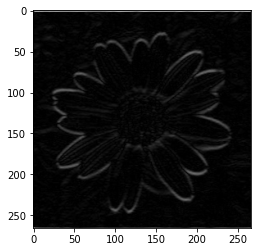

In [63]:
# Horizontal Outlines of image
image_sobel_h = convolution(image_matrix, sobel_h )
image_sobel_h  = np.abs(image_sobel_h)
plt.imshow(image_sobel_h)

convolution progress (in %)...


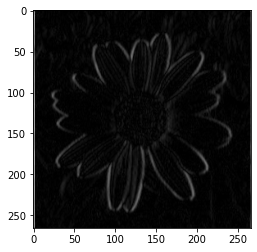

In [64]:
# Vertical Outlines of image
image_sobel_v = convolution(image_matrix, sobel_v )
image_sobel_v = np.abs(image_sobel_v)
plt.imshow(image_sobel_v)

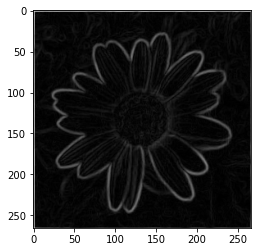

In [65]:
# Applying gradient on horizontal and vertical outlines
sobel_gradient = np.sqrt(image_sobel_h**2 + image_sobel_v**2)
plt.imshow(sobel_gradient)
matrix2pgm(sobel_gradient,initials,'sobel_gradient_flower.pgm')

### Sharpen an Image

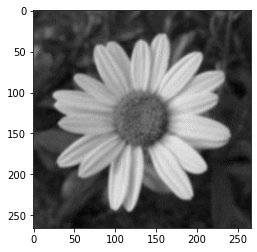

In [66]:
image = read_pgm('flower.pgm')
image_matrix = image[0]
plt.imshow(image_matrix)

convolution progress (in %)...


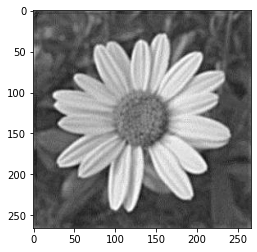

In [67]:
# Sharpened Image
filtered_matrix = convolution(image_matrix, gauss_kernel(9,7))
filtered_matrix = 2*image_matrix-filtered_matrix
filtered_matrix[filtered_matrix>255]=255
plt.imshow(filtered_matrix)
matrix2pgm(filtered_matrix,image[1],output_image_file_name = 'sharpened_flower.pgm')